- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 


> Per a aquest exercici hem agafat una base de dades històrica dels jugadors de la NBA desde 1950, i ens centrarem en l'atribut **height** (alçada dels jugadors).

***Source***
- https://www.kaggle.com/datasets/drgilermo/nba-players-stats

- https://www.thehoopsgeek.com/average-nba-height/

***Content***

The data-set contains aggregate individual statistics for 67 NBA seasons, +3000 players blablabla...


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import scipy.stats as stats 

%matplotlib inline

players = pd.read_csv('C:\\Users\\motxi\\Documents\\Data_Science_IT_Academy\\Sprints\\S05\\Players.csv')


> Examinem les columnes

In [2]:
list(players.columns)

['index',
 'Player',
 'height',
 'weight',
 'collage',
 'born',
 'birth_city',
 'birth_state']

>Glossary 
    
    - Player: Nom del Jugador
    - height: Alçada (en cms)
    - weight: Pes
    - collage: Universitat
    - born: Any de neixement
    - birth_city: Ciutat natal
    - birth_state: Estat natal

In [12]:
y = players[['height', 'born']].groupby(by='born')
y.describe()

height                                                            
        count        mean        std    min     25%    50%     75%    max
born                                                                     
1913.0    1.0  185.000000        NaN  185.0  185.00  185.0  185.00  185.0
1914.0    1.0  180.000000        NaN  180.0  180.00  180.0  180.00  180.0
1915.0    2.0  198.000000  11.313708  190.0  194.00  198.0  202.00  206.0
1917.0    6.0  189.333333   7.865537  180.0  182.00  192.0  196.00  196.0
1918.0    5.0  186.200000   6.906519  180.0  183.00  185.0  185.00  198.0
...       ...         ...        ...    ...     ...    ...     ...    ...
1993.0   50.0  199.920000   7.436370  183.0  196.00  198.0  205.25  216.0
1994.0   41.0  199.829268   8.645526  183.0  193.00  201.0  206.00  213.0
1995.0   31.0  204.258065   7.949708  175.0  201.00  206.0  208.00  221.0
1996.0   19.0  200.789474   9.223032  178.0  196.00  198.0  209.50  213.0
1997.0   10.0  210.400000   7.105553  193.0  208.75  211.0  216.00  216.0

[84 rows x 8 columns]

### Hypothesis Statement

>Partirem de la base que \*la alçada mitja de un jugador de la NBA son mes 2 metres. Es tracta d'una idea preconcebuda bastant establerta en el subconscient col·lectiu, per tant només caldrà buscar un article que sostingui aquesta idea.
- \*(segons font: https://mejorconsalud.as.com/fitness/salud/por-que-los-basquetbolistas-son-tan-altos/)

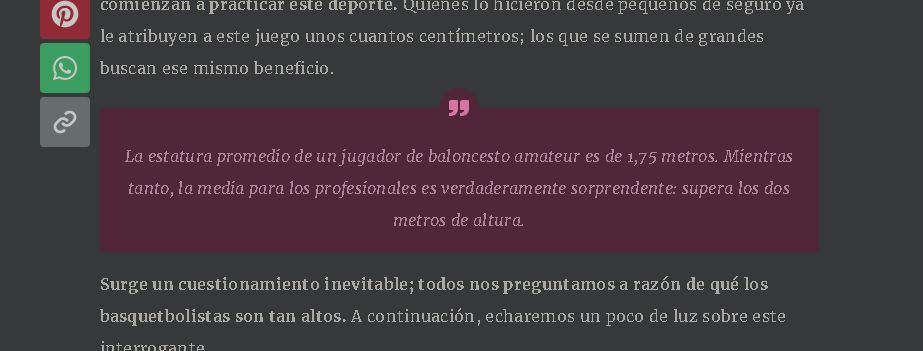

### Null Hypothesis H<sub>0</sub> 
    
La alçada mitjana d'un jugador de la NBA son 200cms o més.

**H<sub>0</sub> : $\mu$<sub>0</sub> >= 200**

### Alternative Hypothesis H<sub>a</sub> 
    
La alçada mitjana d'un jugador de la NBA es < 200cms. 

**H<sub>1</sub> : $\mu$<sub>1</sub> < $\mu$<sub>0</sub>**

### Hypothesis Testing

>Partint de la base de dades realitzem un sampling de valor  n = 30  i n'extreurem la desviació estandar mostral (S) i la mitja de la mostra. A partir d'aquí i seguint la fòrmula del teorema T de distribució calcularem si tenim suficient evidencies per a poder refutar la hipotesis nula descrita anteriorment.

In [9]:
sample_df = players.sample(30)
sample_df

,index,Player,height,weight,collage,born,birth_city,birth_state
3125,3125,Derrick Zimmerman,190.0,88.0,Mississippi State University,1981.0,Monroe,Louisiana
60,60,Dee Gibson,180.0,79.0,Western Kentucky University,1923.0,NaN,NaN
1942,1942,Tim Perry,206.0,90.0,Temple University,1965.0,Freehold,New Jersey
2476,2476,Michael Hawkins,183.0,80.0,Xavier University,1972.0,Canton,Ohio
2408,2408,Frankie King,185.0,83.0,Western Carolina University,1972.0,Baxley,Georgia
2847,2847,Mike Batiste,203.0,102.0,Arizona State University,1977.0,Long Beach,California
174,174,Bob Royer,178.0,70.0,Indiana State University,1927.0,NaN,NaN
2899,2899,Dajuan Wagner,183.0,77.0,University of Texas at Austin,1922.0,NaN,NaN
3490,3490,Malcolm Lee,196.0,90.0,"University of California, Los Angeles",1990.0,Riverside,California
2051,2051,Cedric Ball,203.0,95.0,University of North Carolina at Charlotte,1968.0,Worcester,Massachusetts


In [10]:
sample = sample_df.filter(['height'])

sample.describe()

,height
count,30.000000
mean,195.733333
std,10.010110
min,178.000000
25%,188.500000
50%,194.500000
75%,206.000000
max,213.000000


H<sub>0</sub> : $\mu$<sub>0</sub> = 200

$\bar{X}$ = 195.73

$\sigma$ = 10.01

n = 30

$\alpha$ = 0.05




> Seguint la formula

In [16]:
se_mean = 10.01 / 26**0.5

Z = (195.73 - 200) / (10.01 / 30**0.5)

print('standar error mean = ', se_mean, '\n')
print('z= ', Z)

standar error mean =  1.9631225127332224 

z=  -2.3364388816653996


Per tant podem concloure que amb les proves que tenim, podem refutar H<sub>0</sub> amb H<sub>a</sub>

- Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

- Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.